In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
#Link for the data set-www.cs.toronto.edu/~delve/data/adult/desc.html
df = pd.read_csv('Dataset.data', sep=" ", header=None)
df.columns = ["Age", "WorkClass", "Fnlwgt", "Education","Educational_num","Marital_status",
                "Occupation","Relationship","Race","Gender","Capital_Gain","Capital_Loss","Hours_Per_Week",
                "Native_Country","Income"]


In [3]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Educational_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income'],
      dtype='object')

In [4]:
df.head()


,Age,WorkClass,Fnlwgt,Education,Educational_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              48842 non-null  int64 
 1   WorkClass        48842 non-null  object
 2   Fnlwgt           48842 non-null  int64 
 3   Education        48842 non-null  object
 4   Educational_num  48842 non-null  int64 
 5   Marital_status   48842 non-null  object
 6   Occupation       48842 non-null  object
 7   Relationship     48842 non-null  object
 8   Race             48842 non-null  object
 9   Gender           48842 non-null  object
 10  Capital_Gain     48842 non-null  int64 
 11  Capital_Loss     48842 non-null  int64 
 12  Hours_Per_Week   48842 non-null  int64 
 13  Native_Country   48842 non-null  object
 14  Income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df['Income'].value_counts()

<=50K    37155
>50K     11687
Name: Income, dtype: int64

In [7]:
df.isna().sum()

Age                0
WorkClass          0
Fnlwgt             0
Education          0
Educational_num    0
Marital_status     0
Occupation         0
Relationship       0
Race               0
Gender             0
Capital_Gain       0
Capital_Loss       0
Hours_Per_Week     0
Native_Country     0
Income             0
dtype: int64

In [8]:
df.shape

(48842, 15)

In [9]:
df=df.drop_duplicates(keep='first')#  This dropes the duplicates values as they are very small in number(48842-48790)52

In [10]:
df.shape

(48790, 15)

In [11]:
df.nunique()

Age                   74
WorkClass              9
Fnlwgt             28523
Education             16
Educational_num       16
Marital_status         7
Occupation            15
Relationship           6
Race                   5
Gender                 2
Capital_Gain         123
Capital_Loss          99
Hours_Per_Week        96
Native_Country        42
Income                 2
dtype: int64

In [12]:
df.WorkClass.unique()# Here the ? is extra/none value.

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
df.WorkClass[df.WorkClass=='?'].value_counts()

?    2795
Name: WorkClass, dtype: int64

In [14]:
# This Code will Count the occuring of the '?' in all the columns
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for j in index:
        temp = 0
        if j == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")


The Value Counts of ? in Age
0
The Value Counts of ? in WorkClass
2795
The Value Counts of ? in Fnlwgt
0
The Value Counts of ? in Education
0
The Value Counts of ? in Educational_num
0
The Value Counts of ? in Marital_status
0
The Value Counts of ? in Occupation
2805
The Value Counts of ? in Relationship
0
The Value Counts of ? in Race
0
The Value Counts of ? in Gender
0
The Value Counts of ? in Capital_Gain
0
The Value Counts of ? in Capital_Loss
0
The Value Counts of ? in Hours_Per_Week
0
The Value Counts of ? in Native_Country
856
The Value Counts of ? in Income
0


In [15]:
df = df[df['WorkClass'] != '?']# Dropping the rows whose WorkClass is '?' 
df = df[df['Occupation'] != '?']# Dropping the rows whose occupation is '?' 
df = df[df['Native_Country'] != '?']# Dropping the rows whose occupation is '?' 

In [16]:
df['WorkClass'].value_counts()#Confirming the values in column


Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: WorkClass, dtype: int64

In [17]:
df.describe()

,Age,Fnlwgt,Educational_num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Minimum Age is 17, Avg. Age is 39


# EDA

The maximum age is 90
The minimum age is 17


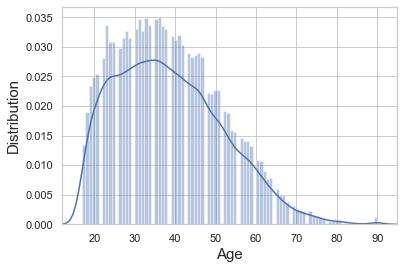

In [18]:
sns.set(style = 'whitegrid')

sns.distplot(df['Age'], bins = 90, color = 'b')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['Age'].max())
print ("The minimum age is", df['Age'].min())

Text(0.5, 1.0, 'Age/Count Distribution')

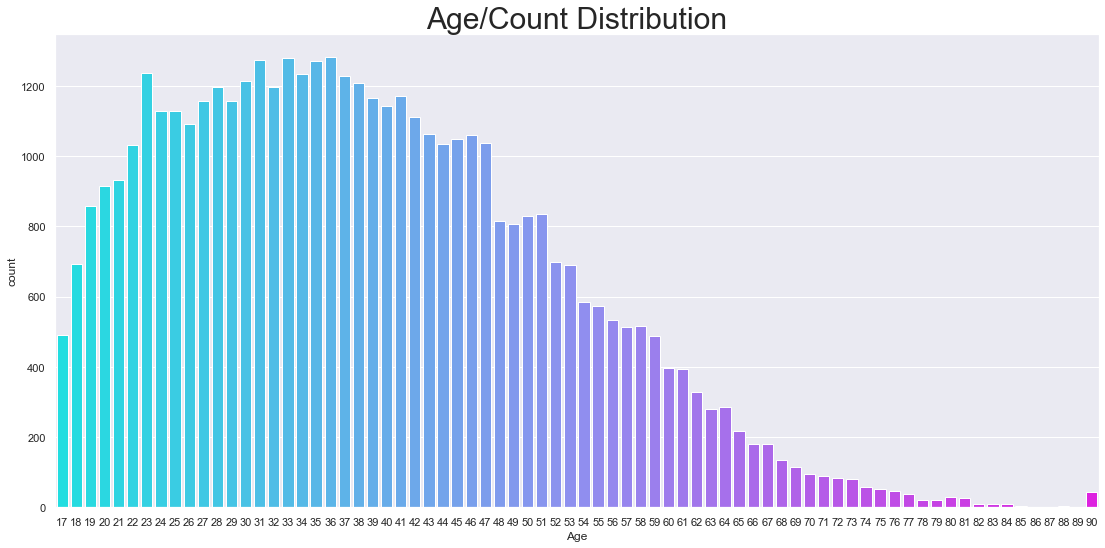

In [19]:
%matplotlib inline
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(18.7,8.7)})
ax = sns.countplot(df['Age'],data=df, palette ='cool')
plt.title('Age/Count Distribution',fontsize=30)

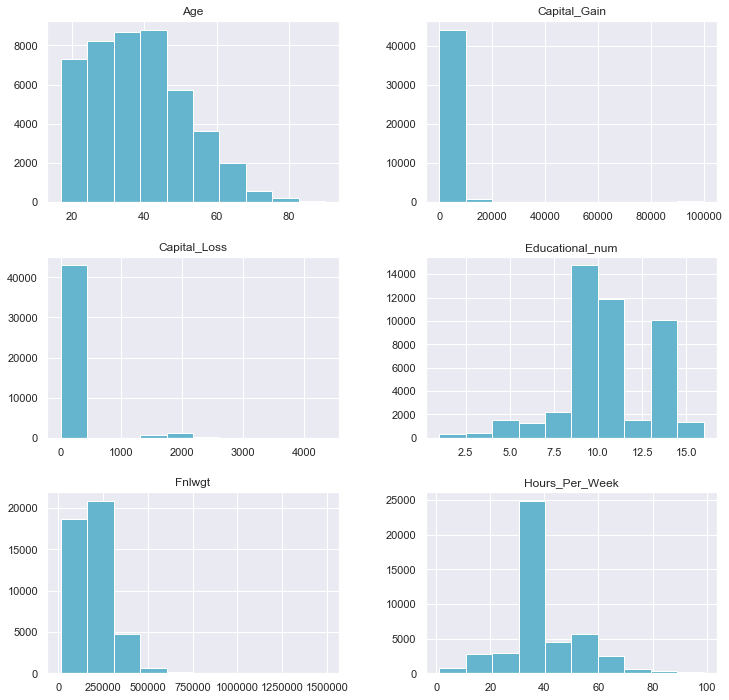

In [20]:
# Distribution of Different Features of the Dataset
df.hist(color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [21]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print (df['Hours_Per_Week'].median())
print (df['Hours_Per_Week'].mean())

40.0
40.9425124515772


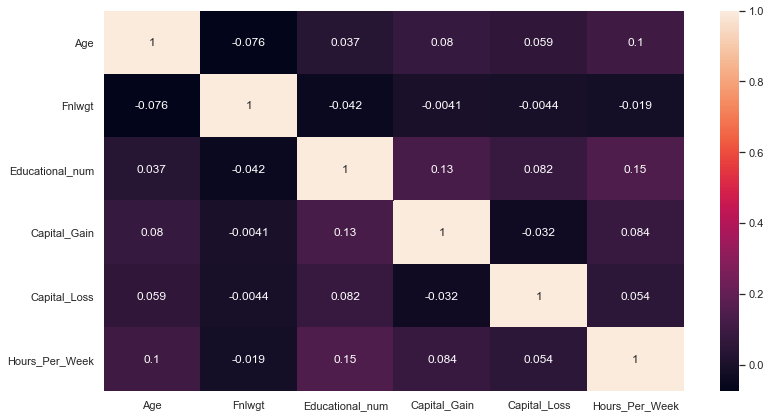

In [22]:
plt.rcParams['figure.figsize'] = [13,7]# This heatmap shows the Correlation between the different variables
sns.heatmap(df.corr(), annot = True);

In [23]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Educational_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income'],
      dtype='object')

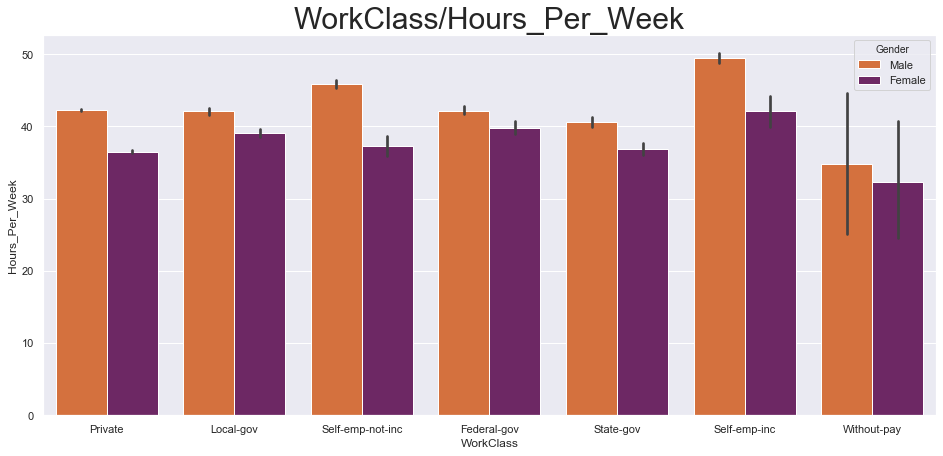

In [24]:
fig = plt.figure(figsize=(16,7))

plt.title("WorkClass/Hours_Per_Week",fontsize=30)
sns.barplot(x="WorkClass",y="Hours_Per_Week",hue='Gender',data=df ,palette='inferno_r')
plt.show()


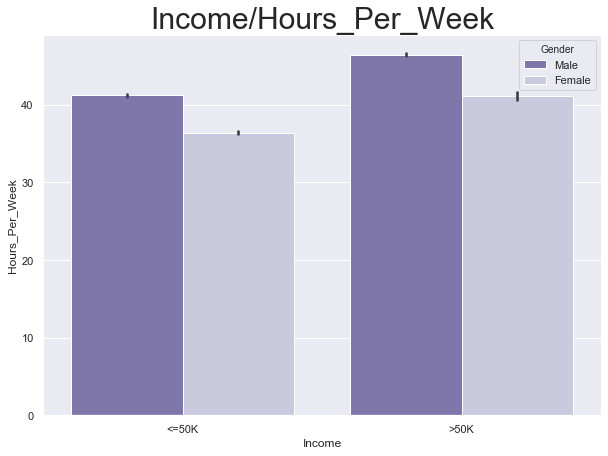

In [25]:
fig = plt.figure(figsize=(10,7))

plt.title("Income/Hours_Per_Week",fontsize=30)
sns.barplot(x="Income",y="Hours_Per_Week",hue='Gender',data=df ,palette='Purples_r')
plt.show()


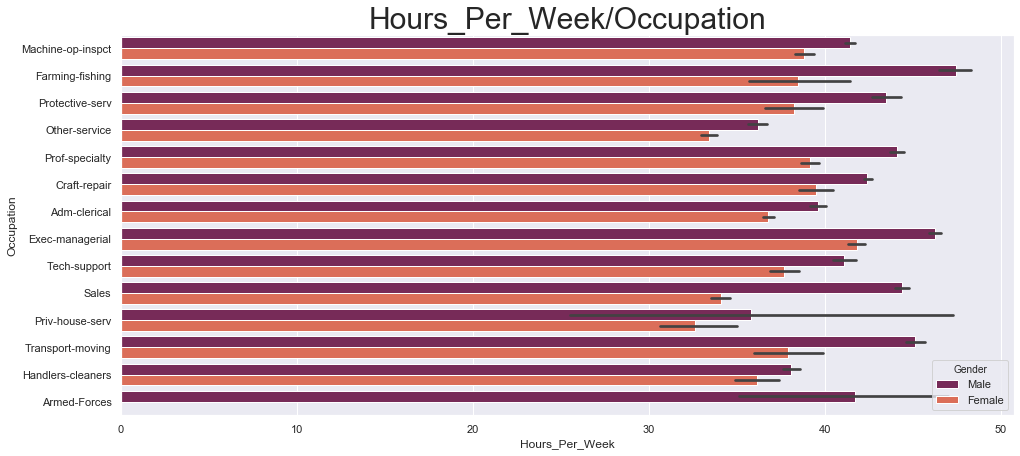

In [26]:
fig = plt.figure(figsize=(16,7))

plt.title("Hours_Per_Week/Occupation",fontsize=30)
sns.barplot(x="Hours_Per_Week",y="Occupation",hue='Gender',data=df ,palette='rocket')

plt.show()

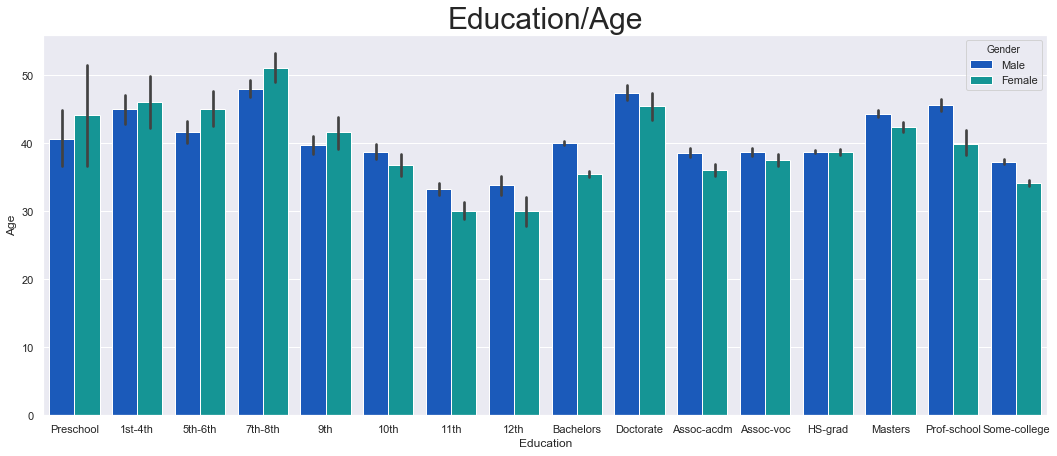

In [27]:
fig = plt.figure(figsize=(18,7))

plt.title("Education/Age",fontsize=30)
sns.barplot(x="Education",y="Age",hue='Gender',data=df ,palette='winter',order = ['Preschool', '1st-4th',
            '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
            'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'])



In [28]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Educational_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income'],
      dtype='object')

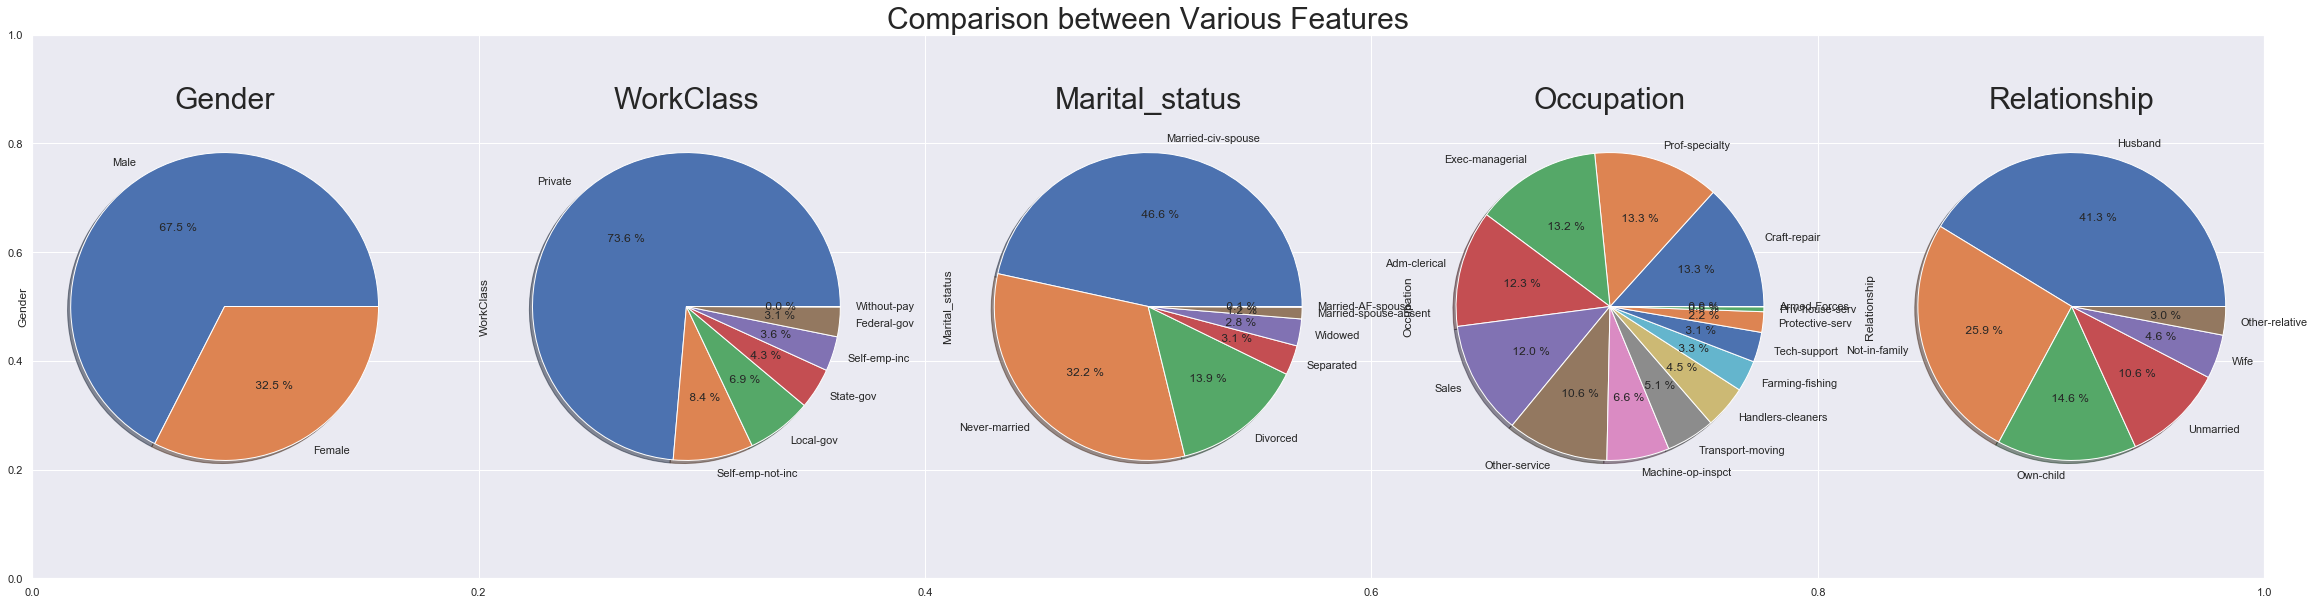

In [29]:
fig = plt.figure(figsize=(40,10))
plt.title("Comparison between Various Features",fontsize=30)


fig.add_subplot(151)
plt.title("Gender",fontsize=30)
df['Gender'].value_counts().plot.pie(autopct ='% 1.1f %%', shadow = True) 

fig.add_subplot(152)
plt.title("WorkClass",fontsize=30)
df['WorkClass'].value_counts().plot.pie(autopct ='% 1.1f %%', shadow = True) 

fig.add_subplot(153)
plt.title("Marital_status",fontsize=30)
df['Marital_status'].value_counts().plot.pie(autopct ='% 1.1f %%', shadow = True) 

fig.add_subplot(154)
plt.title("Occupation",fontsize=30)
df['Occupation'].value_counts().plot.pie(autopct ='% 1.1f %%', shadow = True) 

fig.add_subplot(155)
plt.title("Relationship",fontsize=30)
df['Relationship'].value_counts().plot.pie(autopct ='% 1.1f %%', shadow = True) 
plt.show() 



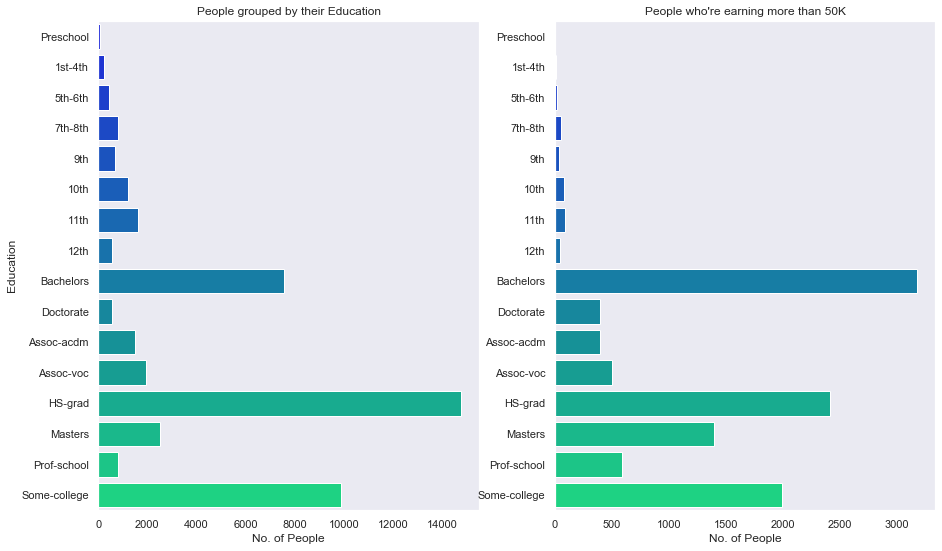

In [30]:
# Grouping people by their education
education_size = df.groupby('Education').size()

# Grouping people who earns more than 50K by their education
more_income = df.loc[df['Income'] == '>50K', ['Education']].groupby('Education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

#plt.setp(sns_ed_1.get_xticklabels(), rotation = 90);
#plt.setp(sns_ed_2.get_xticklabels(), rotation = 90);

In [31]:
df.head()

,Age,WorkClass,Fnlwgt,Education,Educational_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


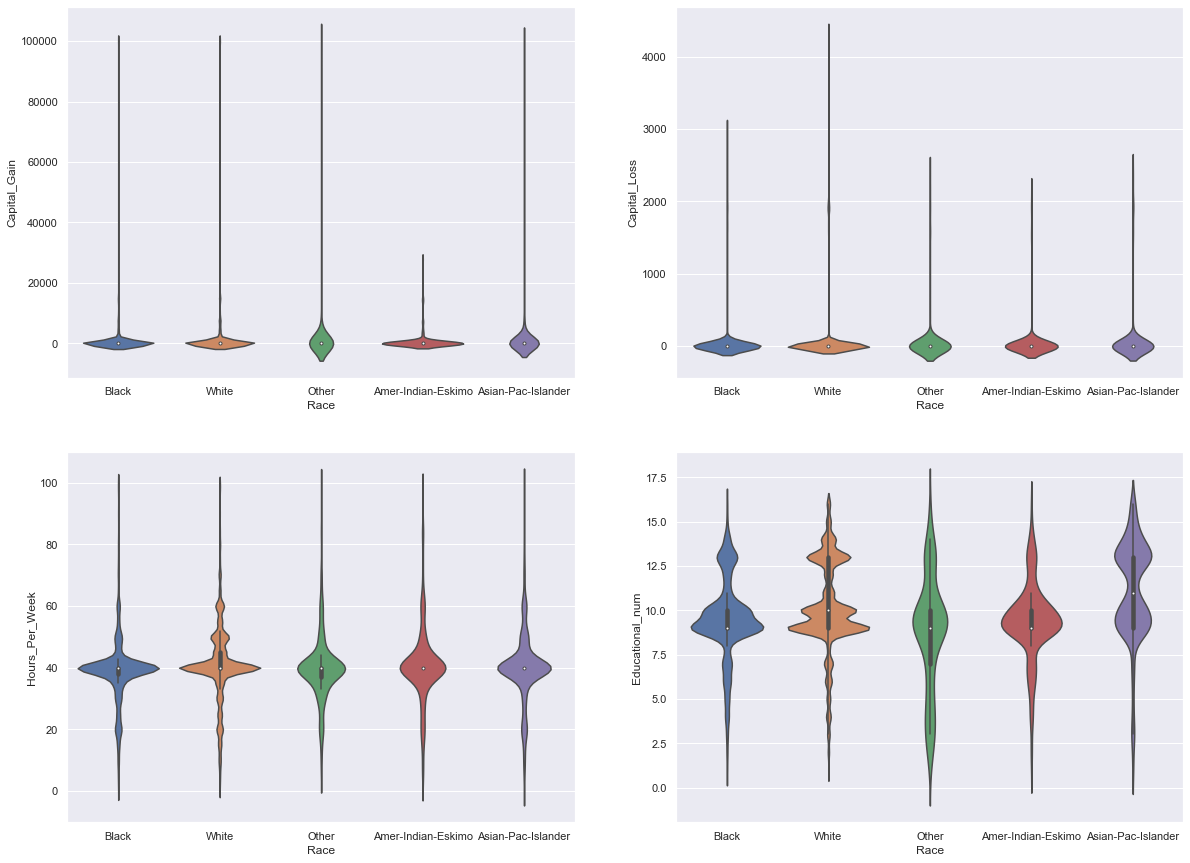

In [32]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [20,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df['Race'], y = df['Capital_Gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['Race'], y = df['Capital_Loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['Race'], y = df['Hours_Per_Week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['Race'], y = df['Educational_num'], data = df);

In [33]:
df_adult = df.copy()

df_adult = df_adult.reset_index(drop = True)
df_adult.head()

,Age,WorkClass,Fnlwgt,Education,Educational_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [34]:
df_adult.shape

(45175, 15)

In [35]:
df_adult.describe()

,Age,Fnlwgt,Educational_num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
# Changing the income column into Numerical Value
df_adult['Income'] = df_adult['Income'].map({'<=50K':0, '>50K':1})

In [37]:
df_adult.head()

,Age,WorkClass,Fnlwgt,Education,Educational_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [38]:
df_adult['Income'].value_counts()

0    33973
1    11202
Name: Income, dtype: int64

In [39]:
# Changing the Categorical Values to Numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df_adult.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df_adult[feature] = label_encoder_feat[feature].fit_transform(df_adult[feature])

df_adult.head()

,Age,WorkClass,Fnlwgt,Education,Educational_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [40]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45175 entries, 0 to 45174
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              45175 non-null  int64
 1   WorkClass        45175 non-null  int32
 2   Fnlwgt           45175 non-null  int64
 3   Education        45175 non-null  int32
 4   Educational_num  45175 non-null  int64
 5   Marital_status   45175 non-null  int32
 6   Occupation       45175 non-null  int32
 7   Relationship     45175 non-null  int32
 8   Race             45175 non-null  int32
 9   Gender           45175 non-null  int32
 10  Capital_Gain     45175 non-null  int64
 11  Capital_Loss     45175 non-null  int64
 12  Hours_Per_Week   45175 non-null  int64
 13  Native_Country   45175 non-null  int32
 14  Income           45175 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 3.8 MB


In [41]:
df_adult = shuffle(df_adult)#Shuffling the Data

features_ = df_adult.drop(columns = ['Income', 'Educational_num'])
target = df_adult['Income']
#Dividing the dataset in features & Target


X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

#Performing 70,30 split with the total data.
print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (31622, 13)
Test data set size :  (13553, 13)


In [42]:
# pip install xgboost

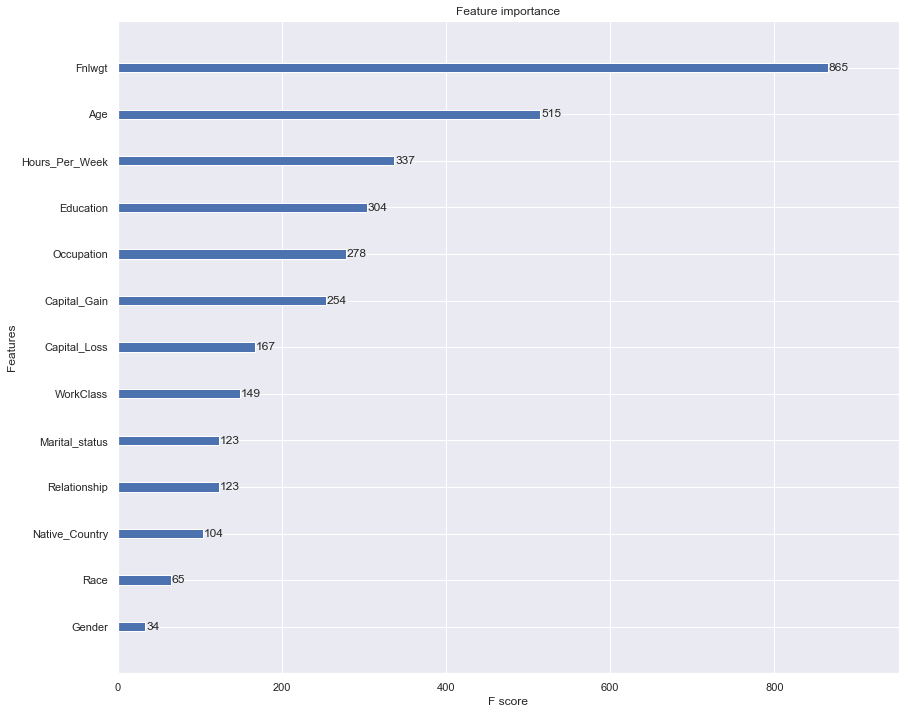

In [43]:
# Plotting the feature importances using the Boosted Gradient Descent
from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

In [44]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [45]:
# Training the model_1
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)

print ("The accuracy of model 1 : ",accuracy_score(y_test, pred_1))
print ("The f1 score of model 1 : ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of model 1 :  0.7795322068914632
The f1 score of model 1 :  0.38594327990135635


In [46]:
# Training the model_2
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.8511030768095624
The f1 score of model 2 :  0.6755627009646302


In [47]:


# Training the model 3
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 200)
model_3 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred_3))
print ("The f1 score of model 3 : ", f1_score(y_test, pred_3, average = 'binary'))



[17:28:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The accuracy of model 3 :  0.8634250719397919
The f1 score of model 3 :  0.7024594116701495


In [48]:
# Training the model 4
NB = BernoulliNB(alpha = 0.3)
model_4 = NB.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)

print ("The accuracy of model 4 : ",accuracy_score(y_test, pred_4))
print ("The f1 score of model 4 : ", f1_score(y_test, pred_4, average = 'binary'))

The accuracy of model 4 :  0.7250793182321257
The f1 score of model 4 :  0.5696465696465697


In [49]:
# Training the model 5
svc = SVC(kernel = 'rbf', max_iter = 1000, probability = True)
model_5 = svc.fit(X_train, y_train)

# Predictions
pred_5 = model_5.predict(X_test)

print ("The accuracy of model 5 : ",accuracy_score(y_test, pred_5))
print ("The f1 score of model 5 : ", f1_score(y_test, pred_5, average = 'binary'))

The accuracy of model 5 :  0.26414815907917066
The f1 score of model 5 :  0.4001924580501594


In [50]:
list_pred = [pred_1, pred_2, pred_3, pred_4, pred_5]
model_names = ["Logistic Regression", "Random Forest Classifier", "Boosted Gradient Descent", "Bernoulli NB", "SVC"]

for i, predictions in enumerate(list_pred) :
    print ("Classification Report of ", model_names[i])
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

Classification Report of  Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87     10152
        >50K       0.64      0.28      0.39      3401

    accuracy                           0.78     13553
   macro avg       0.72      0.61      0.63     13553
weighted avg       0.76      0.78      0.75     13553

Classification Report of  Random Forest Classifier

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     10152
        >50K       0.75      0.62      0.68      3401

    accuracy                           0.85     13553
   macro avg       0.81      0.77      0.79     13553
weighted avg       0.85      0.85      0.85     13553

Classification Report of  Boosted Gradient Descent

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91     10152
        >50K       0.77      0.64      0.70      3401

    accuracy                   

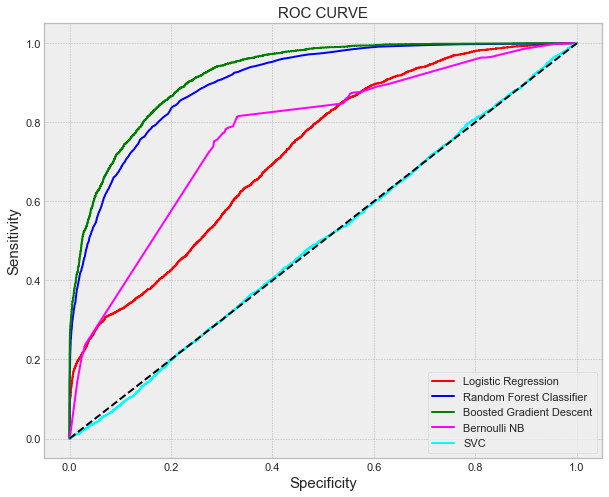

In [51]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve
models = [model_1, model_2, model_3, model_4, model_5]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()

In [52]:
#The third model with Boosted Gradient Descent was Performing more Acurate and Fits Roc curve also well. 
#With 
# The accuracy of model 3 :  0.8696967461078728
# The f1 score of model 3 :  0.717530390275112